## Dependencies

In [1]:
# Data Management
import pickle
#import datetime as dt

In [2]:
# Data manipulation dependencies
#import math
import statistics
#import scipy.stats
#import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Custom data handling methods
import prep_IO

In [4]:
# Directory of pre-determined lustre failed jobs
src = './lustre_set.pkl'

In [5]:
search_raw = pickle.load( open( src, "rb" ) )
search_set = [ item for item in search_raw if '2020-09' not in item[1] and '2020-10' not in item[1] ]

#### Generate sample data

In [6]:
sample_n = 2
#sample_info = prep_IO.search_sample_n( search_set, sample_n )
sample_info = {'Sample': [('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'),
  ('comet-12-13', '2020-05-12T08:24:41', '2020-05-13T10:00:45', '33283684')],
 'Raw': {('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
   'Single JobID': False},
  ('comet-12-13',
   '2020-05-12T08:24:41',
   '2020-05-13T10:00:45',
   '33283684'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
    '/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589377050.gz'], 'Single JobID': False}},
 'Out': {('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
   'Single JobID': False},
  ('comet-12-13',
   '2020-05-12T08:24:41',
   '2020-05-13T10:00:45',
   '33283684'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
    '/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589377050.gz'], 'Single JobID': False}}}

In [7]:
# setup friendly keys and fill in search results
keys = list(sample_info["Out"].keys())
sample_hosts = prep_IO.fill_host_info( sample_info )
sample_accts = prep_IO.fill_acct_info( sample_info, keys )

In [8]:
sample_accts

{('comet-14-71',
  '2020-05-27T01:47:29',
  '2020-05-27T05:30:13',
  '33659176'): {'JobID': '33659176', 'Start': '2020-05-27T01:47:29', 'End': '2020-05-27T05:30:13', 'Submit': '2020-05-26T18:22:46', 'Partition': 'compute', 'Timelimit': '2-00:00:00', 'State': 'FAILED', 'NNodes': '8', 'ReqCPUS': '64', 'NodeList\n': 'comet-06-56,comet-07-14,comet-11-24,comet-14-71,comet-15-34,comet-20-[09,53],comet-22-30\n', 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'], 'Single JobID': False},
 ('comet-12-13',
  '2020-05-12T08:24:41',
  '2020-05-13T10:00:45',
  '33283684'): {'JobID': '33283684', 'Start': '2020-05-12T08:24:41', 'End': '2020-05-13T10:00:45', 'Submit': '2020-05-11T10:37:35', 'Partition': 'compute', 'Timelimit': '1-23:59:00', 'State': 'FAILED', 'NNodes': '4', 'ReqCPUS': '96', 'NodeList\n': 'comet-12-[13,28,30,39]\n', 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
   '/oasis/projects

## Data

1. Size
2. Missingness
3. Shape
4. Central Tendency
5. Variability

- first level keys: search labels
- second level keys: ['Acct Info', 'Host Info', 'Source Files']
- 'Host Info' keys: ['Timely Data', 'Schemas', 'Specs']


In [10]:
# Token search from file lines
#lines = prep_IO.unzip_txt( check["Source"][0] )
#token = 'ps'
#
#for line in lines:
#    if token in line:
#        print(line)

### Preview Sample

In [11]:
sample_info["Sample"]

[('comet-14-71', '2020-05-27T01:47:29', '2020-05-27T05:30:13', '33659176'),
 ('comet-12-13', '2020-05-12T08:24:41', '2020-05-13T10:00:45', '33283684')]

In [12]:
sample_tar = keys[0]
sample_accts[ sample_tar ]

{'JobID': '33659176',
 'Start': '2020-05-27T01:47:29',
 'End': '2020-05-27T05:30:13',
 'Submit': '2020-05-26T18:22:46',
 'Partition': 'compute',
 'Timelimit': '2-00:00:00',
 'State': 'FAILED',
 'NNodes': '8',
 'ReqCPUS': '64',
 'NodeList\n': 'comet-06-56,comet-07-14,comet-11-24,comet-14-71,comet-15-34,comet-20-[09,53],comet-22-30\n',
 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
 'Single JobID': False}

In [13]:
sample_hosts[ sample_tar ][ "Specs" ]

['tacc_stats 2.3.4',
 'hostname comet-14-71.sdsc.edu',
 'uname Linux x86_64 3.10.0-957.12.2.el7.x86_64 #1 SMP Tue May 14 21:24:32 UTC 2019',
 'uptime 2937699']

In [14]:
sample_hosts[ sample_tar ][ "Source" ]

['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz']

In [15]:
sample_hosts[ sample_tar ][ "Single JobID" ]

False

## Plot stuff

plot templates

In [16]:
## Histogram
##hist, bin_edges = np.histogram(x, bins=10)
#fig, ax = plt.subplots()
#ax.hist(x, bin_edges, cumulative=False)
#ax.set_xlabel('x')
#ax.set_ylabel('Frequency')
#plt.show()
#
## Pie Chart
## x, y, z = 128, 256, 1024
#fig, ax = plt.subplots()
#ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
#plt.show()
#
## Horizontal Bar Chart
##x = np.arange(21)
##y = np.random.randint(21, size=21)
##err = np.random.randn(21)
#fig, ax = plt.subplots())
#ax.bar(x, y, yerr=err)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#plt.show()
#
## Scatterplot w/ Line
##x = np.arange(21)
##y = 5 + 2 * x + 2 * np.random.randn(21)
##slope, intercept, r, *__ = scipy.stats.linregress(x, y)
##line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#fig, ax = plt.subplots()
#ax.plot(x, y, linewidth=0, marker='s', label='Data points')
#ax.plot(x, intercept + slope * x, label=line)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.legend(facecolor='white')
#plt.show()
#
## Seaborn heatmap w/ 2 var
##Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
##Cols = ['A', 'B', 'C', 'D']
##data = abs(np.random.randn(5, 4))
##df = DataFrame(data, index=Index, columns=Cols)
#sns.heatmap(df, annot=True)

In [17]:
# SAVE template
#save_thing = test_dict
#f = open("save_thing_name.pkl","wb")
#pickle.dump( save_thing,f )
#f.close()

# read in search_out from saved dict in src_file
#save_thing = pickle.load( open( "save_thing_name.pkl", "rb" ) )
#keys = list(save_thing.keys())
#len(keys)

# Analysis

#### Setup Structures

GOAL:
Format data for a visualization with X-axis as time, y-axis as cat value, and each cat as a plotted line

In [18]:
# All valid 'Timely Data' occurences in dataset
data_lists = [ sample_hosts[key]['Data'] for key in keys ]

# friendlllyy data
df_a = pd.DataFrame( data_lists[0] )
df_b = pd.DataFrame( data_lists[1] )

# timelines for each
times_a = list( df_a[4].unique() )
times_b = list( df_b[4].unique() )

#### Identify Variable behavior

In [19]:
target = data_lists[0]

In [20]:
timedata_by_label = prep_IO.labeled_data( target )
timedata_keys = list( timedata_by_label.keys() )

In [21]:
cat_counts = { key:len(value) for key,value in timedata_by_label.items() }
base = statistics.mode( cat_counts.values() )

std_cats = []
irreg_cats = []

for cat,count in cat_counts.items():
    if count != base:
        if cat not in irreg_cats:
            irreg_cats.append( cat )
    else:
        if cat not in std_cats:
            std_cats.append( cat )
            
    #print( f"{cat} recorded {count} times." )

### General Descriptive Statistics

Data manipulation:
* If host recorded value at `t_0` and increased with each `t_i`, record base value and decrease each `t_i` by base value before performing descriptive operations
    * Certain categories record values that do not necessarily reset between jobs.
* If all `t_i` represent same value, move category to "Static" and do not include in descriptive operations
* `std_cats` appear for each `t_i`
* `irreg_cats` appear sporadically throughout run

In [22]:
descriptives = prep_IO.get_host_descriptives( timedata_by_label, timedata_keys )
std_desc = { key:value for key,value in descriptives.items() if key in std_cats }
irr_desc = { key:value for key,value in descriptives.items() if key in irreg_cats }
static_cats = descriptives["Static"]
n_static = len(static_cats)

#prep_IO.quick_save( descriptives, label='lustre_set_descriptives' )

In [23]:
print( f"Static categories:\t { n_static }")
print( f"Unique categories:\t {len(descriptives) - 1}" )
print( f"\tStandard:\t { len(std_desc) }")
print( f"\tIrregular:\t { len(irr_desc) }")

Static categories:	 907
Unique categories:	 626
	Standard:	 574
	Irregular:	 52


### Review Starting Values

In [24]:
std_keys = list(std_desc.keys())

In [25]:
nonzero_starts = {}

for key in std_keys:
    if "Starting Value" in std_desc[key]:
        nonzero_starts[key] = std_desc[key]["Starting Value"]
nonzero_starts

{('block', 'md1', 'rd_ios'): 1132399.0,
 ('block', 'md1', 'rd_sectors(U=512B)'): 37361874.0,
 ('block', 'md1', 'wr_ios'): 4380760.0,
 ('block', 'md1', 'wr_sectors(U=512B)'): 101217488.0,
 ('block', 'sda', 'rd_ios'): 575046.0,
 ('block', 'sda', 'rd_merges'): 3046.0,
 ('block', 'sda', 'rd_sectors(U=512B)'): 19289981.0,
 ('block', 'sda', 'rd_ticks(U=ms)'): 215976.0,
 ('block', 'sda', 'wr_ios'): 2809445.0,
 ('block', 'sda', 'wr_merges'): 1047542.0,
 ('block', 'sda', 'wr_sectors(U=512B)'): 232354087.0,
 ('block', 'sda', 'wr_ticks(U=ms)'): 3286598.0,
 ('block', 'sda', 'io_ticks(U=ms)'): 764559.0,
 ('block', 'sdb', 'rd_ios'): 555829.0,
 ('block', 'sdb', 'rd_merges'): 2756.0,
 ('block', 'sdb', 'rd_sectors(U=512B)'): 18448683.0,
 ('block', 'sdb', 'rd_ticks(U=ms)'): 191289.0,
 ('block', 'sdb', 'wr_ios'): 2133800.0,
 ('block', 'sdb', 'wr_merges'): 1029167.0,
 ('block', 'sdb', 'wr_sectors(U=512B)'): 231908639.0,
 ('block', 'sdb', 'wr_ticks(U=ms)'): 3646828.0,
 ('block', 'sdb', 'io_ticks(U=ms)'): 8

## Graphs

In [26]:
nice_times = [ prep_IO.get_time( t_i )[11:-3]+'A' for t_i in times_a ]
ts = [ 't'+str(i) for i in range( len(nice_times) ) ]
y_data = std_desc[ std_keys[1] ]["Values"]

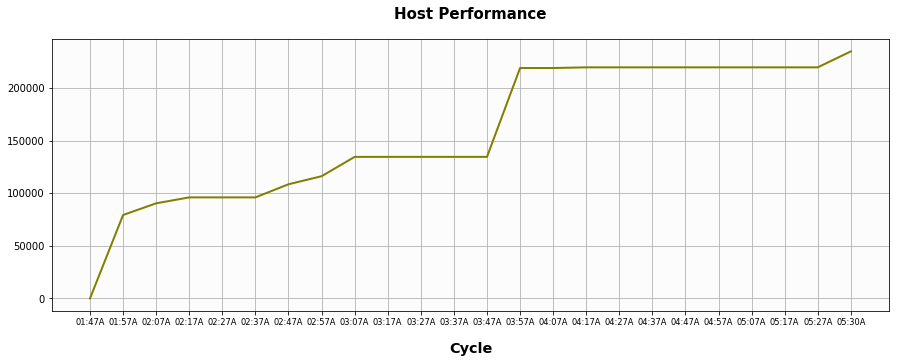

In [27]:
# Setup top graph
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#ax1.plot(ts, y_data_a, marker='.', markersize=5.0, linewidth=2.0, color="black", alpha=0.6)
ax1.plot(ts, y_data, marker='', color='olive', linewidth=2)
plt.grid( True )

# Label graphs
#      Top graph
ax1.set_xticklabels( labels=nice_times, fontsize='small' )
ax1.set_title( label=f"Host Performance", pad=20, fontdict={'fontweight': 'bold', 'fontsize': 15} )
ax1.set_xlabel( "Cycle", labelpad=15, fontweight='bold', fontsize='x-large' )
#ax1.set_ylabel( "Performance", labelpad=15, fontweight='bold', fontsize='x-large' )

# Fill graph backgrounds
ax1.set_facecolor( '0.99' )

# Setup spacing of graphs
plt.gcf().set_size_inches(15, 11)

# Save figure as .png
#plt.savefig( f"./{std_cats_target}.png", bbox='tight')

In [28]:
temp_dict = { f'y{i}': std_desc[ std_keys[i] ][ "Values" ] for i in range(len(std_keys)) }
ys = list(temp_dict.keys())

part = ys[100:110]

graph_df_full = pd.DataFrame( temp_dict )
graph_df = graph_df_full[[ y for y in part ]]

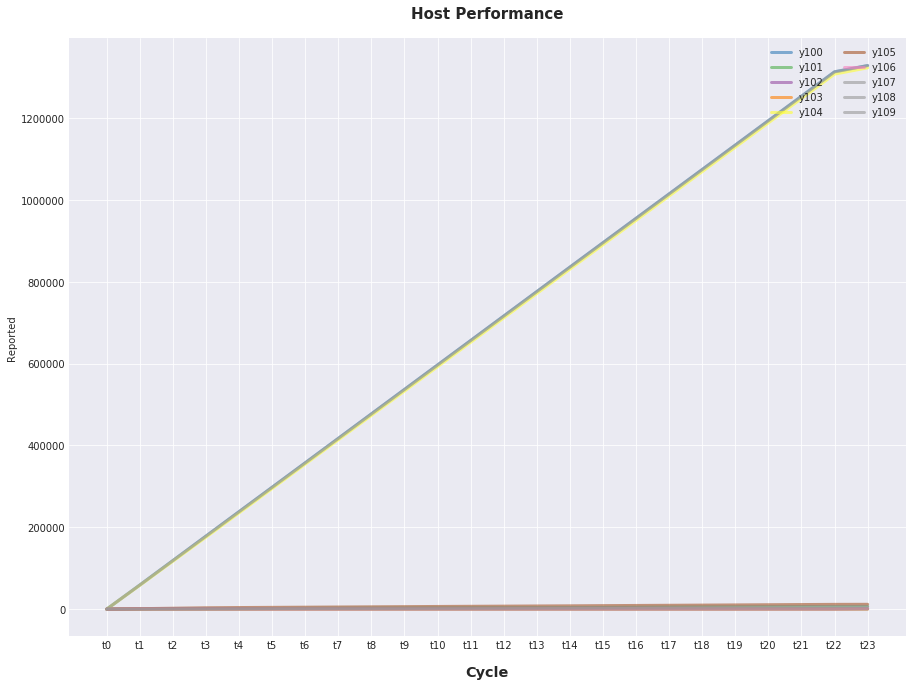

In [29]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num = 0
for column in graph_df:
    num += 1
    plt.plot( ts, graph_df[ column ],
              marker='', color=palette( num ), linewidth=3, alpha=0.6,
              label=column
            )
 
#
plt.legend(loc='upper right', ncol=2)
 
# Add titles
plt.title(label=f"Host Performance", pad=20, fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xlabel("Cycle", labelpad=15, fontweight='bold', fontsize='x-large')
plt.ylabel("Reported")

# Fill graph backgrounds
ax1.set_facecolor( '0.99' )

# Setup spacing of graphs
plt.gcf().set_size_inches(15, 11)

In [30]:
focal = ['y3','y10', 'y25', 'y29', 'y31', 'y33', 'y37',
         'y43', 'y48', 'y53', 'y57', 'y62', 'y75', 'y84',
         'y88', 'y92','y96', 'y104']

### From outlier list 'focal', restring to show categories
Note: This is not a comprehensive list of categories, but it will be used as a base and potentially amended if needed.

In [31]:
for key,val in temp_dict.items():
    if key in focal:
        i = int(key[1:])
        print(std_keys[i])

('block', 'md1', 'wr_sectors(U=512B)')
('block', 'sda', 'wr_sectors(U=512B)')
('cpu', '22', 'idle(U=cs)')
('cpu', '20', 'idle(U=cs)')
('cpu', '21', 'user(U=cs)')
('cpu', '21', 'idle(U=cs)')
('cpu', '11', 'idle(U=cs)')
('cpu', '13', 'user(U=cs)')
('cpu', '12', 'user(U=cs)')
('cpu', '15', 'user(U=cs)')
('cpu', '14', 'user(U=cs)')
('cpu', '17', 'user(U=cs)')
('cpu', '18', 'user(U=cs)')
('cpu', '1', 'user(U=cs)')
('cpu', '0', 'user(U=cs)')
('cpu', '3', 'user(U=cs)')
('cpu', '2', 'user(U=cs)')
('cpu', '4', 'user(U=cs)')


### Problem children

In [32]:
all_desc = { key:value for key,value in descriptives.items() if key != "Static" }
all_desc_keys = list(all_desc.keys())

In [35]:
inspect_common = []

for token in ['wr','user','idle']:
    for key in all_desc_keys:
        check = key[2]
        if token in check:
            inspect_common.append(key)

#### 1) Nonzero Starts

In [36]:
nonzero_common = { tup: all_desc[tup] for tup in inspect_common if tup in nonzero_starts }
for key,key_dict in nonzero_common.items():
    start = key_dict["Starting Value"]
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Base:\t\t{ start }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Adjusted:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'md1', 'wr_ios')
Base:		4380760.0
Skew:		0.014113677711158804
Adjusted:
[0.0, 1358.0, 1962.0, 2735.0, 3334.0, 3965.0, 4618.0, 5233.0, 5920.0, 6665.0, 7233.0, 7762.0, 8336.0, 10433.0, 11083.0, 11864.0, 12452.0, 13091.0, 13733.0, 14430.0, 15091.0, 15836.0, 16473.0, 16979.0]

Raw:
[4380760.0, 4382118.0, 4382722.0, 4383495.0, 4384094.0, 4384725.0, 4385378.0, 4385993.0, 4386680.0, 4387425.0, 4387993.0, 4388522.0, 4389096.0, 4391193.0, 4391843.0, 4392624.0, 4393212.0, 4393851.0, 4394493.0, 4395190.0, 4395851.0, 4396596.0, 4397233.0, 4397739.0]


Category:	('block', 'md1', 'wr_sectors(U=512B)')
Base:		101217488.0
Skew:		-0.004426788322030567
Adjusted:
[0.0, 11176.0, 16184.0, 24872.0, 29824.0, 35048.0, 40600.0, 45704.0, 56600.0, 65056.0, 69760.0, 74152.0, 79072.0, 106344.0, 111712.0, 120448.0, 125312.0, 130584.0, 136048.0, 141784.0, 147248.0, 155728.0, 160984.0, 165080.0]

Raw:
[101217488.0, 101228664.0, 101233672.0, 101242360.0, 101247312.0, 101252536.0, 101258088.0, 10126

`user` and `idle` tokens also appear in nonzero_start but `wr_sectors` does not. Other `wr` categories should be followed up on

#### 2) wombat / wr

In [37]:
lustre_tups = [('llite', 'wombat-clilov', 'write_bytes(U=B)'),
                  ('osc', 'wombat-clilov', 'write_bytes(U=B)'),
                  ('osc', 'wombat-clilov', 'ost_write') ]
lustre_list = { tup: all_desc[tup] for tup in inspect_common if tup in lustre_tups }

for key,key_dict in lustre_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    raw = key_dict["Raw Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Adjusted:\n{ adj }\n")
    print(f"Raw:\n{ raw }")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('llite', 'wombat-clilov', 'write_bytes(U=B)')
Skew:		4.587317109255645
Adjusted:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1183905792.0]

Raw:
[1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1039239563125.0]
Raw:
[1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 

Uhhhhhh that's weird. Follow up on why value reported in tn and if that associated with error

#### 3) ios

In [38]:
ios_list = { tup: all_desc[tup] for tup in inspect_common if 'ios' in tup[2] }
for key,key_dict in ios_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Values:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'md1', 'wr_ios')
Skew:		0.014113677711158804
Values:
[0.0, 1358.0, 1962.0, 2735.0, 3334.0, 3965.0, 4618.0, 5233.0, 5920.0, 6665.0, 7233.0, 7762.0, 8336.0, 10433.0, 11083.0, 11864.0, 12452.0, 13091.0, 13733.0, 14430.0, 15091.0, 15836.0, 16473.0, 16979.0]

Raw:
[4380760.0, 4382118.0, 4382722.0, 4383495.0, 4384094.0, 4384725.0, 4385378.0, 4385993.0, 4386680.0, 4387425.0, 4387993.0, 4388522.0, 4389096.0, 4391193.0, 4391843.0, 4392624.0, 4393212.0, 4393851.0, 4394493.0, 4395190.0, 4395851.0, 4396596.0, 4397233.0, 4397739.0]


Category:	('block', 'sda', 'wr_ios')
Skew:		-0.026204400107456203
Values:
[0.0, 297.0, 543.0, 879.0, 1110.0, 1378.0, 1664.0, 1915.0, 2224.0, 2527.0, 2758.0, 2968.0, 3224.0, 3728.0, 3949.0, 4243.0, 4476.0, 4709.0, 4965.0, 5260.0, 5524.0, 5836.0, 6098.0, 6149.0]

Raw:
[2809445.0, 2809742.0, 2809988.0, 2810324.0, 2810555.0, 2810823.0, 2811109.0, 2811360.0, 2811669.0, 2811972.0, 2812203.0, 2812413.0, 2812669.0, 2813173.0, 2813394.0, 2813688.0, 2813921.0

TBD

#### 4) ticks

In [39]:
ticks_list = { tup: all_desc[tup] for tup in inspect_common if 'ticks' in tup[2] }
for key,key_dict in ticks_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Values:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'sda', 'wr_ticks(U=ms)')
Skew:		0.145170128491004
Values:
[0.0, 13.0, 13.0, 27.0, 28.0, 28.0, 28.0, 28.0, 35.0, 45.0, 45.0, 45.0, 45.0, 247.0, 248.0, 250.0, 251.0, 252.0, 252.0, 252.0, 252.0, 259.0, 259.0, 263.0]

Raw:
[3286598.0, 3286611.0, 3286611.0, 3286625.0, 3286626.0, 3286626.0, 3286626.0, 3286626.0, 3286633.0, 3286643.0, 3286643.0, 3286643.0, 3286643.0, 3286845.0, 3286846.0, 3286848.0, 3286849.0, 3286850.0, 3286850.0, 3286850.0, 3286850.0, 3286857.0, 3286857.0, 3286861.0]


Category:	('block', 'sdb', 'wr_ticks(U=ms)')
Skew:		0.09293370679950985
Values:
[0.0, 77.0, 77.0, 80.0, 80.0, 81.0, 81.0, 81.0, 87.0, 91.0, 91.0, 91.0, 92.0, 295.0, 295.0, 303.0, 304.0, 305.0, 305.0, 305.0, 305.0, 311.0, 311.0, 315.0]

Raw:
[3646828.0, 3646905.0, 3646905.0, 3646908.0, 3646908.0, 3646909.0, 3646909.0, 3646909.0, 3646915.0, 3646919.0, 3646919.0, 3646919.0, 3646920.0, 3647123.0, 3647123.0, 3647131.0, 3647132.0, 3647133.0, 3647133.0, 3647133.0, 3647133.0, 3647139.0, 3647139.0,

TBD

#### 5) merges

In [40]:
merges_list = { tup: all_desc[tup] for tup in inspect_common if 'merges' in tup[2] }
for key,key_dict in merges_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Values:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'sda', 'wr_merges')
Skew:		0.06724867920901466
Values:
[0.0, 361.0, 508.0, 692.0, 821.0, 974.0, 1135.0, 1259.0, 1447.0, 1606.0, 1727.0, 1828.0, 1993.0, 2657.0, 2790.0, 2981.0, 3166.0, 3287.0, 3472.0, 3654.0, 3782.0, 3983.0, 4162.0, 4353.0]

Raw:
[1047542.0, 1047903.0, 1048050.0, 1048234.0, 1048363.0, 1048516.0, 1048677.0, 1048801.0, 1048989.0, 1049148.0, 1049269.0, 1049370.0, 1049535.0, 1050199.0, 1050332.0, 1050523.0, 1050708.0, 1050829.0, 1051014.0, 1051196.0, 1051324.0, 1051525.0, 1051704.0, 1051895.0]


Category:	('block', 'sdb', 'wr_merges')
Skew:		-0.004296437282461869
Values:
[0.0, 553.0, 696.0, 863.0, 1037.0, 1184.0, 1326.0, 1492.0, 1613.0, 1800.0, 1944.0, 2084.0, 2178.0, 2841.0, 3034.0, 3210.0, 3310.0, 3501.0, 3632.0, 3789.0, 3979.0, 4135.0, 4260.0, 4497.0]

Raw:
[1029167.0, 1029720.0, 1029863.0, 1030030.0, 1030204.0, 1030351.0, 1030493.0, 1030659.0, 1030780.0, 1030967.0, 1031111.0, 1031251.0, 1031345.0, 1032008.0, 1032201.0, 1032377.0, 1032477.0, 1032668.0

TBD

#### 6) sectors

In [41]:
sectors_list = { tup: all_desc[tup] for tup in inspect_common if 'sectors' in tup[2] }
for key,key_dict in sectors_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Values:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'md1', 'wr_sectors(U=512B)')
Skew:		-0.004426788322030567
Values:
[0.0, 11176.0, 16184.0, 24872.0, 29824.0, 35048.0, 40600.0, 45704.0, 56600.0, 65056.0, 69760.0, 74152.0, 79072.0, 106344.0, 111712.0, 120448.0, 125312.0, 130584.0, 136048.0, 141784.0, 147248.0, 155728.0, 160984.0, 165080.0]

Raw:
[101217488.0, 101228664.0, 101233672.0, 101242360.0, 101247312.0, 101252536.0, 101258088.0, 101263192.0, 101274088.0, 101282544.0, 101287248.0, 101291640.0, 101296560.0, 101323832.0, 101329200.0, 101337936.0, 101342800.0, 101348072.0, 101353536.0, 101359272.0, 101364736.0, 101373216.0, 101378472.0, 101382568.0]


Category:	('block', 'sda', 'wr_sectors(U=512B)')
Skew:		0.0027094656681110477
Values:
[0.0, 4936.0, 7800.0, 12872.0, 15384.0, 18440.0, 21856.0, 24576.0, 30600.0, 35088.0, 37528.0, 39648.0, 42776.0, 56784.0, 59176.0, 63952.0, 66848.0, 69360.0, 72728.0, 76232.0, 79008.0, 84176.0, 87424.0, 89304.0]

Raw:
[232354087.0, 232359023.0, 232361887.0, 232366959.0, 232369471.0, 

TBD

### Follow-up: `wombat`

In [42]:
wombat_keys = []

for key in std_keys:
    if 'wombat' in key[1]:
        wombat_keys.append(key)
        
wombat_list = { tup: all_desc[tup] for tup in wombat_keys }

for key,key_dict in wombat_list.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Adjusted:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('llite', 'wombat-clilov', 'write_bytes(U=B)')
Skew:		4.587317109255645
Adjusted:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1183905792.0]

Raw:
[1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1038055657333.0, 1039239563125.0]


Category:	('llite', 'wombat-clilov', 'ioctl')
Skew:		4.587317109255645
Adjusted:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0]

Raw:
[41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0, 41690.0

#### Needs further inspection ^^^

### Review Skews

In [43]:
med_skew = [ key for key in all_desc_keys if (np.absolute( all_desc[key]["Skew"] ) >= 0.5) and (np.absolute( all_desc[key]["Skew"] ) < 1.0) ] 
high_skew = [ key for key in all_desc_keys if np.absolute( all_desc[key]["Skew"] ) >= 1.0 ]

In [44]:
med_skew_desc = { tup: all_desc[tup] for tup in med_skew }

for key,key_dict in med_skew_desc.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Adjusted:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'sda', 'rd_sectors(U=512B)')
Skew:		-0.524269664373359
Adjusted:
[0.0, 40856.0, 46040.0, 49424.0, 49424.0, 49424.0, 56160.0, 59784.0, 67192.0, 67200.0, 67200.0, 67200.0, 67200.0, 106856.0, 106856.0, 107504.0, 107504.0, 107504.0, 107504.0, 107504.0, 107504.0, 107504.0, 107504.0, 115264.0]

Raw:
[19289981.0, 19330837.0, 19336021.0, 19339405.0, 19339405.0, 19339405.0, 19346141.0, 19349765.0, 19357173.0, 19357181.0, 19357181.0, 19357181.0, 19357181.0, 19396837.0, 19396837.0, 19397485.0, 19397485.0, 19397485.0, 19397485.0, 19397485.0, 19397485.0, 19397485.0, 19397485.0, 19405245.0]


Category:	('cpu', '21', 'system(U=cs)')
Skew:		-0.513682811162634
Adjusted:
[0.0, 5.0, 7.0, 24.0, 25.0, 27.0, 31.0, 33.0, 36.0, 2873.0, 2876.0, 2878.0, 2881.0, 2884.0, 2886.0, 2932.0, 2935.0, 2937.0, 2940.0, 2943.0, 2946.0, 3023.0, 3025.0, 3027.0]

Raw:
[2849032.0, 2849037.0, 2849039.0, 2849056.0, 2849057.0, 2849059.0, 2849063.0, 2849065.0, 2849068.0, 2851905.0, 2851908.0, 2851910.0, 2851913

In [45]:
high_skew_desc = { tup: all_desc[tup] for tup in high_skew }

for key,key_dict in high_skew_desc.items():
    skaw = key_dict["Skew"]
    adj = key_dict["Values"]
    print(f"Category:\t{ key }")
    print(f"Skew:\t\t{ skaw }")
    print(f"Adjusted:\n{ adj }\n")
    try:
        raw = key_dict["Raw Values"]
        print(f"Raw:\n{ raw }")
        print()
    except:
        print()
    print("=============================================================================================================")
    print()

Category:	('block', 'sda', 'rd_merges')
Skew:		-2.3197400427383705
Adjusted:
[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

Raw:
[3046.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3051.0, 3051.0, 3051.0, 3051.0, 3051.0, 3051.0, 3051.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0, 3052.0]


Category:	('cpu', '22', 'iowait(U=cs)')
Skew:		-4.449595456495829
Adjusted:
[0.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

Raw:
[33757.0, 33763.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0, 33764.0]


Category:	('cpu', '20', 'user(U=cs)')
Skew:		-1.4704552973984035
Adjusted:
[0.0, 3.0, 7.0, 1524.0, 1524.0, 1525.0, 1527.0, 1527.0, 1529.0, 1550.0, 1551.0, 1553.0, 1554.0, 1555.0, 